In [122]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.figure as mfig


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
ride_city_combined=pd.merge(ride_data,city_data,on="city",how="left")
# Display the data table
ride_city_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

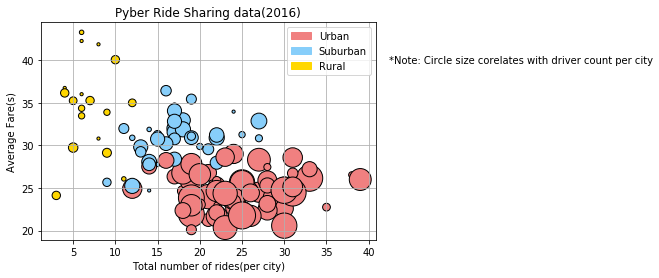

In [151]:
# Obtain the x and y coordinates for each of the three city types
grouped_by_city=ride_city_combined.groupby(["city"])
x=grouped_by_city["ride_id"].size().tolist()
y=grouped_by_city["fare"].mean()
size_p=grouped_by_city["driver_count"].unique().tolist()
sizes=[]
for size in size_p:
    sizes.append(size*10)
color_index=grouped_by_city["type"].unique().tolist()
color_in = []
colors=[]
for color_i in color_index:
    color_in.append(color_i[0])
    if color_i=="Urban":
        colors.append("LightCoral")
    elif color_i=="Suburban":
        colors.append("LightSkyBlue")
    elif color_i=="Rural":
        colors.append("Gold")


#Build the scatter plots for each city types
plt.scatter(x, y, marker="o",s=sizes,facecolors=colors,edgecolors="black",alpha=1)

# # Incorporate the other graph properties
plt.title("Pyber Ride Sharing data(2016)")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average Fare(s)")
plt.grid(True)
# Create a legend

LightCoral_patch = mpatches.Circle((2,1),3,color='LightCoral', label='Urban')
LightSkyBlue_patch = mpatches.Circle((2,2),3,color='LightSkyBlue', label='Suburban')
Gold_patch = mpatches.Circle((2,3),3,color='Gold', label='Rural')
plt.legend(handles=[LightCoral_patch,LightSkyBlue_patch,Gold_patch])


# Incorporate a text label regarding circle size
plt.text(58, 40,'*Note: Circle size corelates with driver count per city', ha='center', va='center')
# Save Figure
plt.savefig("../Images/ride_sharing.png")
plt.show()

## Total Fares by City Type

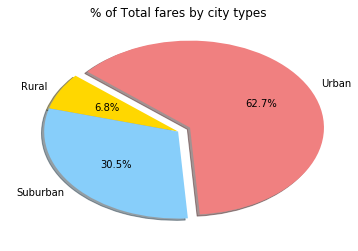

In [69]:
# Calculate Type Percents
groupby_type=ride_city_combined.groupby("type")
type_number=groupby_type["fare"].sum()
total=0
for i in range(len(type_number)):
    total+=type_number[i]
type_percentage=[]
for i in range(len(type_number)):
    type_percentage.append(type_number[i]/total*100)

# Build Pie Chart
types=("Rural","Suburban","Urban")
explode=(0,0,0.1)
colors=["gold","LightSkyBlue","LightCoral"]
plt.pie(type_percentage, explode=explode,colors=colors,labels=types,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total fares by city types")
# Save Figure
plt.savefig("../Images/Fares_by_city_type.png")
plt.show()

## Total Rides by City Type

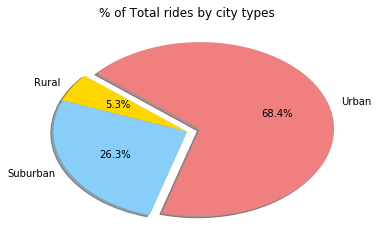

In [67]:
# Calculate Ride Percents
groupby_type=ride_city_combined.groupby("type")
type_number=groupby_type["ride_id"].size()
total=0
for i in range(len(type_number)):
    total+=type_number[i]
type_percentage=[]
for i in range(len(type_number)):
    type_percentage.append(type_number[i]/total*100)
# Build Pie Chart
types=("Rural","Suburban","Urban")
explode=(0,0,0.1)
colors=["gold","LightSkyBlue","LightCoral"]
plt.pie(type_percentage, explode=explode,colors=colors,labels=types,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total rides by city types")
# Save Figure
plt.savefig("../Images/Rides_by_city_type.png")
plt.show()


## Total Drivers by City Type

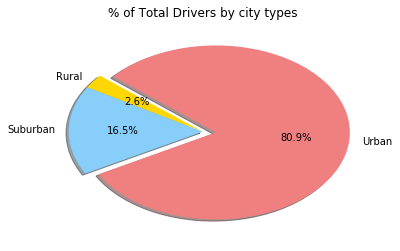

In [92]:
# Calculate Driver Percents
groupby_type=city_data.groupby("type")
drivers_bytype=groupby_type["driver_count"].sum().tolist()
total=0
for i in range(len(drivers_bytype)):
    total+=drivers_bytype[i]
type_percentage=[]
for i in range(len(type_number)):
    type_percentage.append(drivers_bytype[i]/total*100)
# Build Pie Charts
types=("Rural","Suburban","Urban")
explode=(0,0,0.1)
colors=["gold","LightSkyBlue","LightCoral"]
plt.pie(type_percentage, explode=explode,colors=colors,labels=types,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by city types")
# Save Figure
plt.savefig("../Images/Drivers_by_city_types.png")
